<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 561286dc20be22d88e11747647c43573e7e8c8dd

matplotlib: 3.7.0
numpy     : 1.23.5
watermark : 2.4.2



In [3]:
plt.style.use('d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

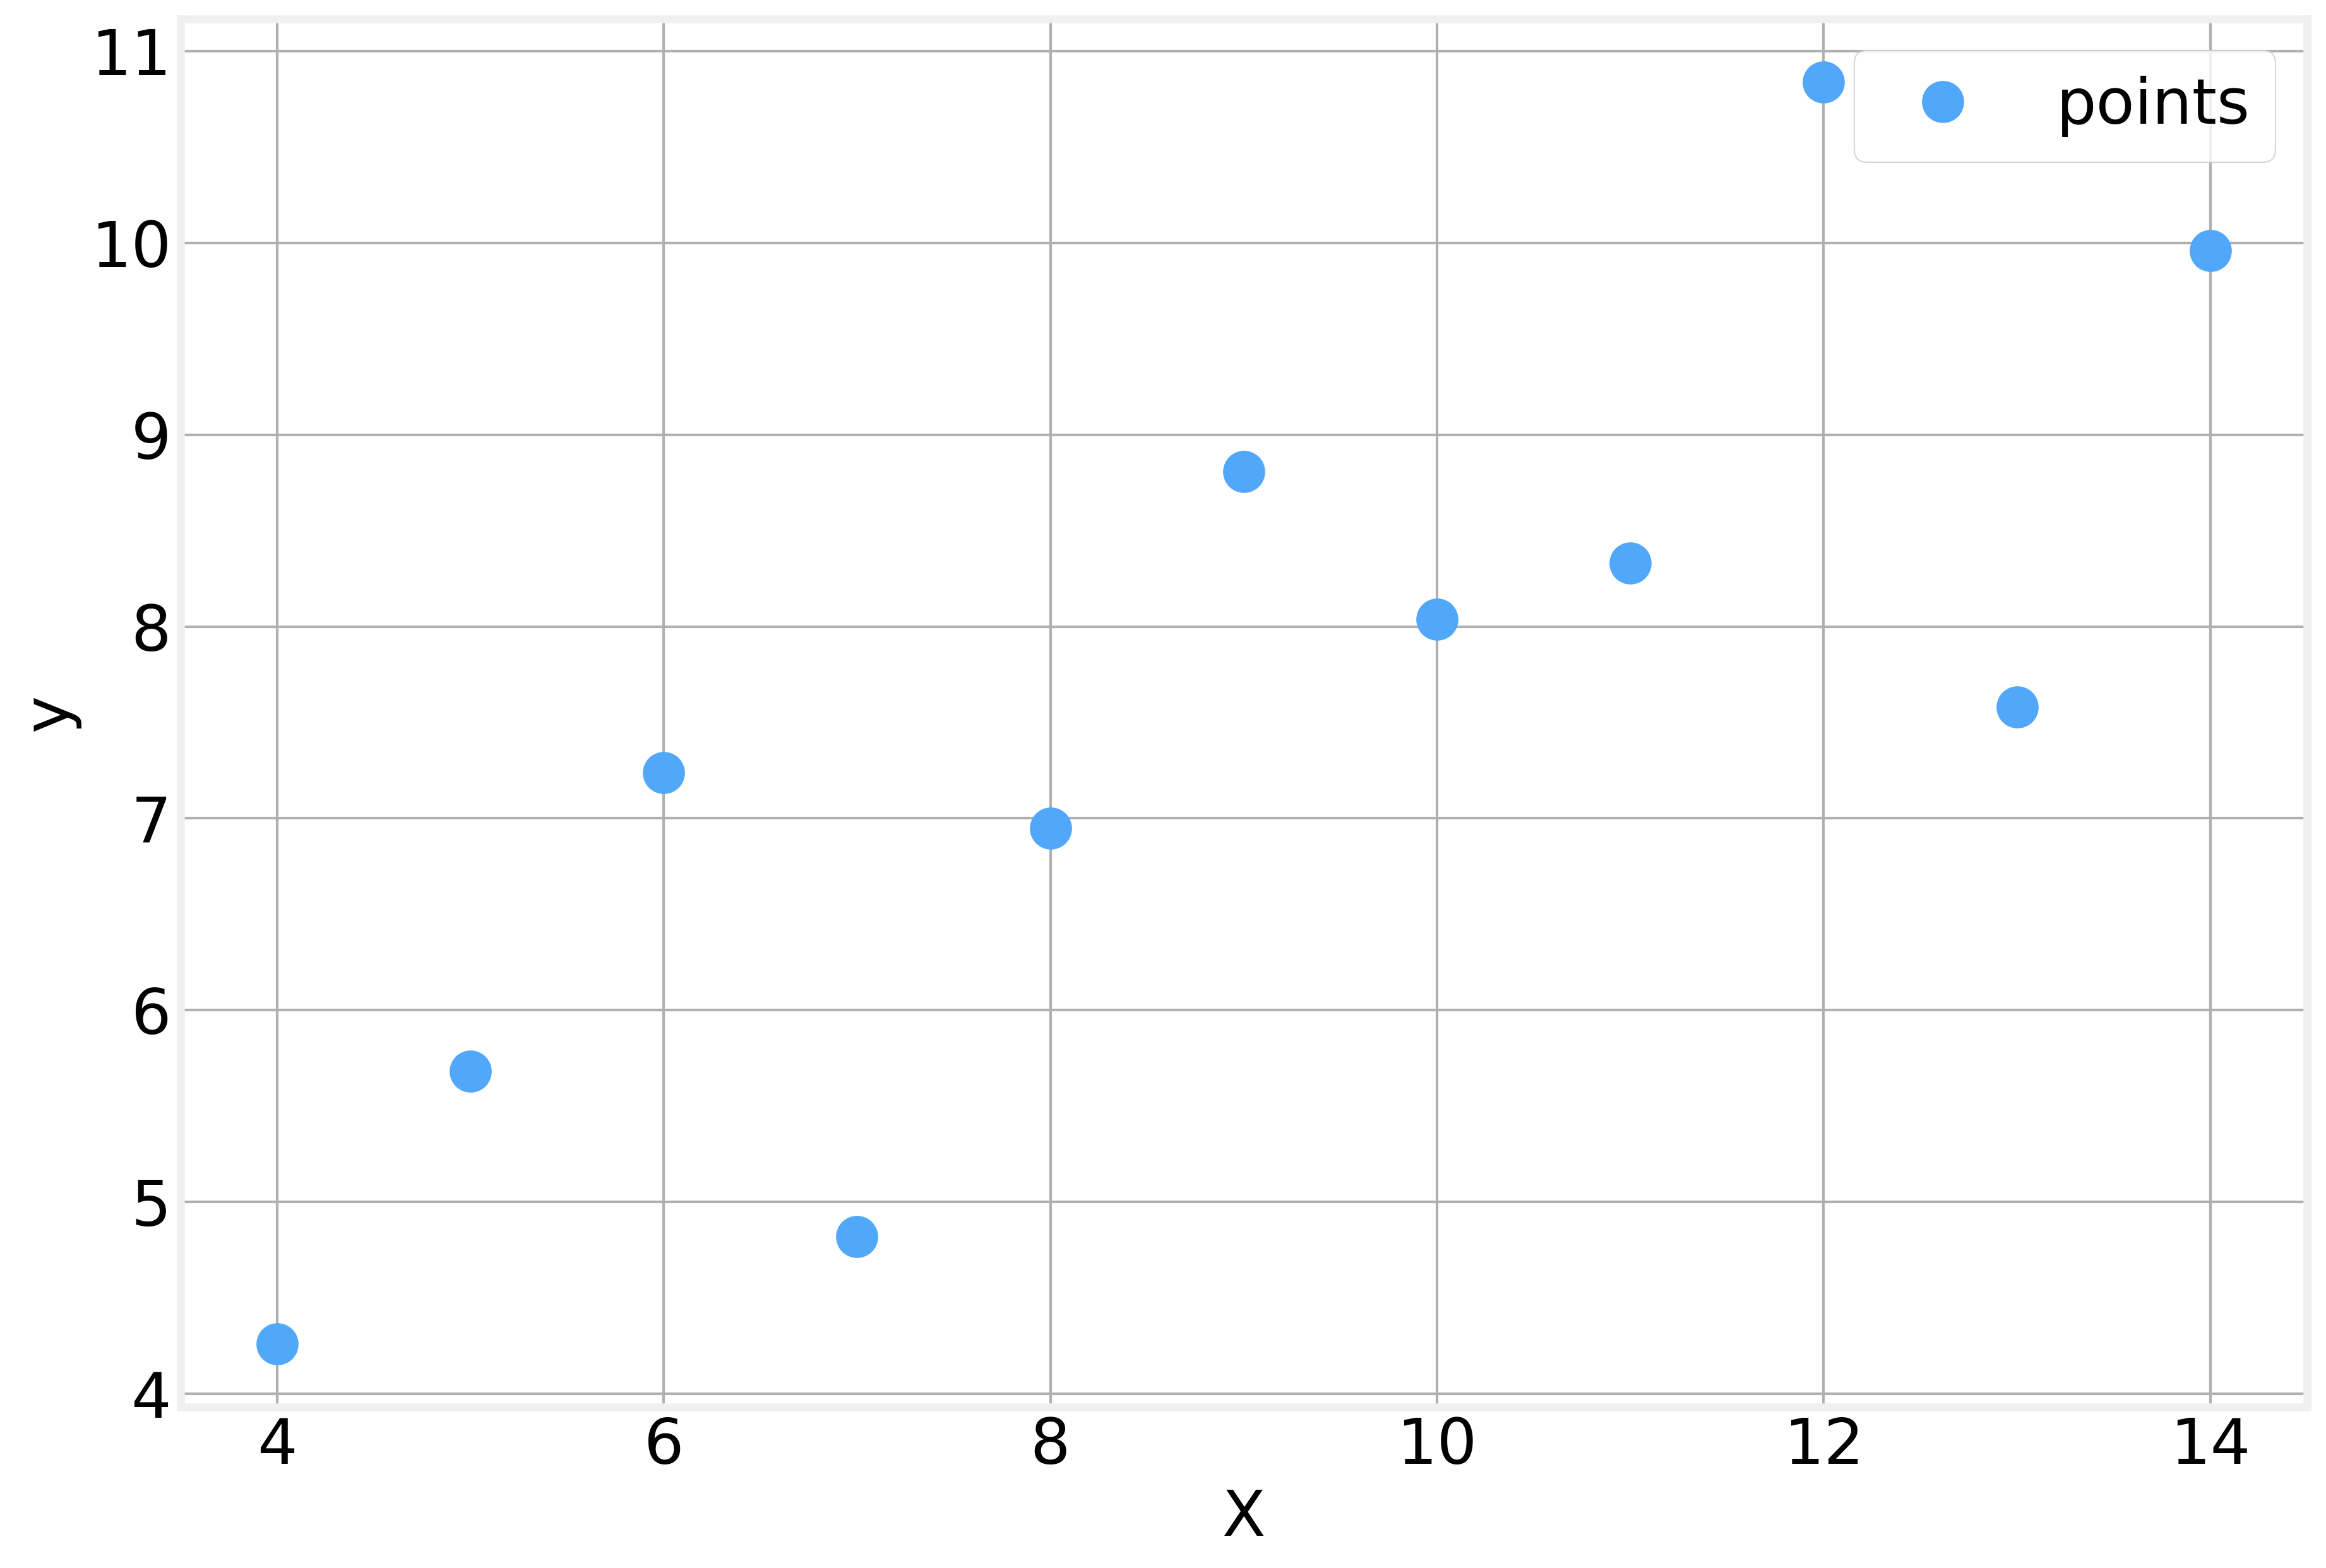

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) # Add x0 for the bias/intercept

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.0335500262665798 0.0008894001723132039 [0.27816613 0.76961458]
200 0.9537148133942814 0.0007153557726362614 [0.55897412 0.74180911]
300 0.889502345074956 0.0005753696675286912 [0.81081249 0.71687219]
400 0.8378554471797153 0.0004627770781701068 [1.0366699 0.6945079]
500 0.7963151960101683 0.0003722174389192423 [1.23922667 0.67445083]
600 0.7629038482322393 0.0002993791792447187 [1.42088663 0.65646295]
700 0.7360306799458598 0.0002407944486033653 [1.5838056  0.64033079]
800 0.7144162518614849 0.00019367401108005833 [1.729917   0.62586291]
900 0.6970314948266626 0.0001557744490594537 [1.86095478 0.61288761]
1000 0.6830487155470063 0.000125291353468171 [1.97847402 0.60125092]
1100 0.6718021898698315 0.0001007734153366524 [2.08386936 0.59081472]
1200 0.6627564674653179 8.105332856167546e-05 [2.17839156 0.58145518]
1300 0.6554808788819397 6.519221412704113e-05 [2.26316236 0.57306122]
1400 0.6496290312497187 5.2434919801558344e-05 [2.33918776 0.56553322]
1500 0.6449223164158204 4.21740

Text(0, 0.5, 'Error')

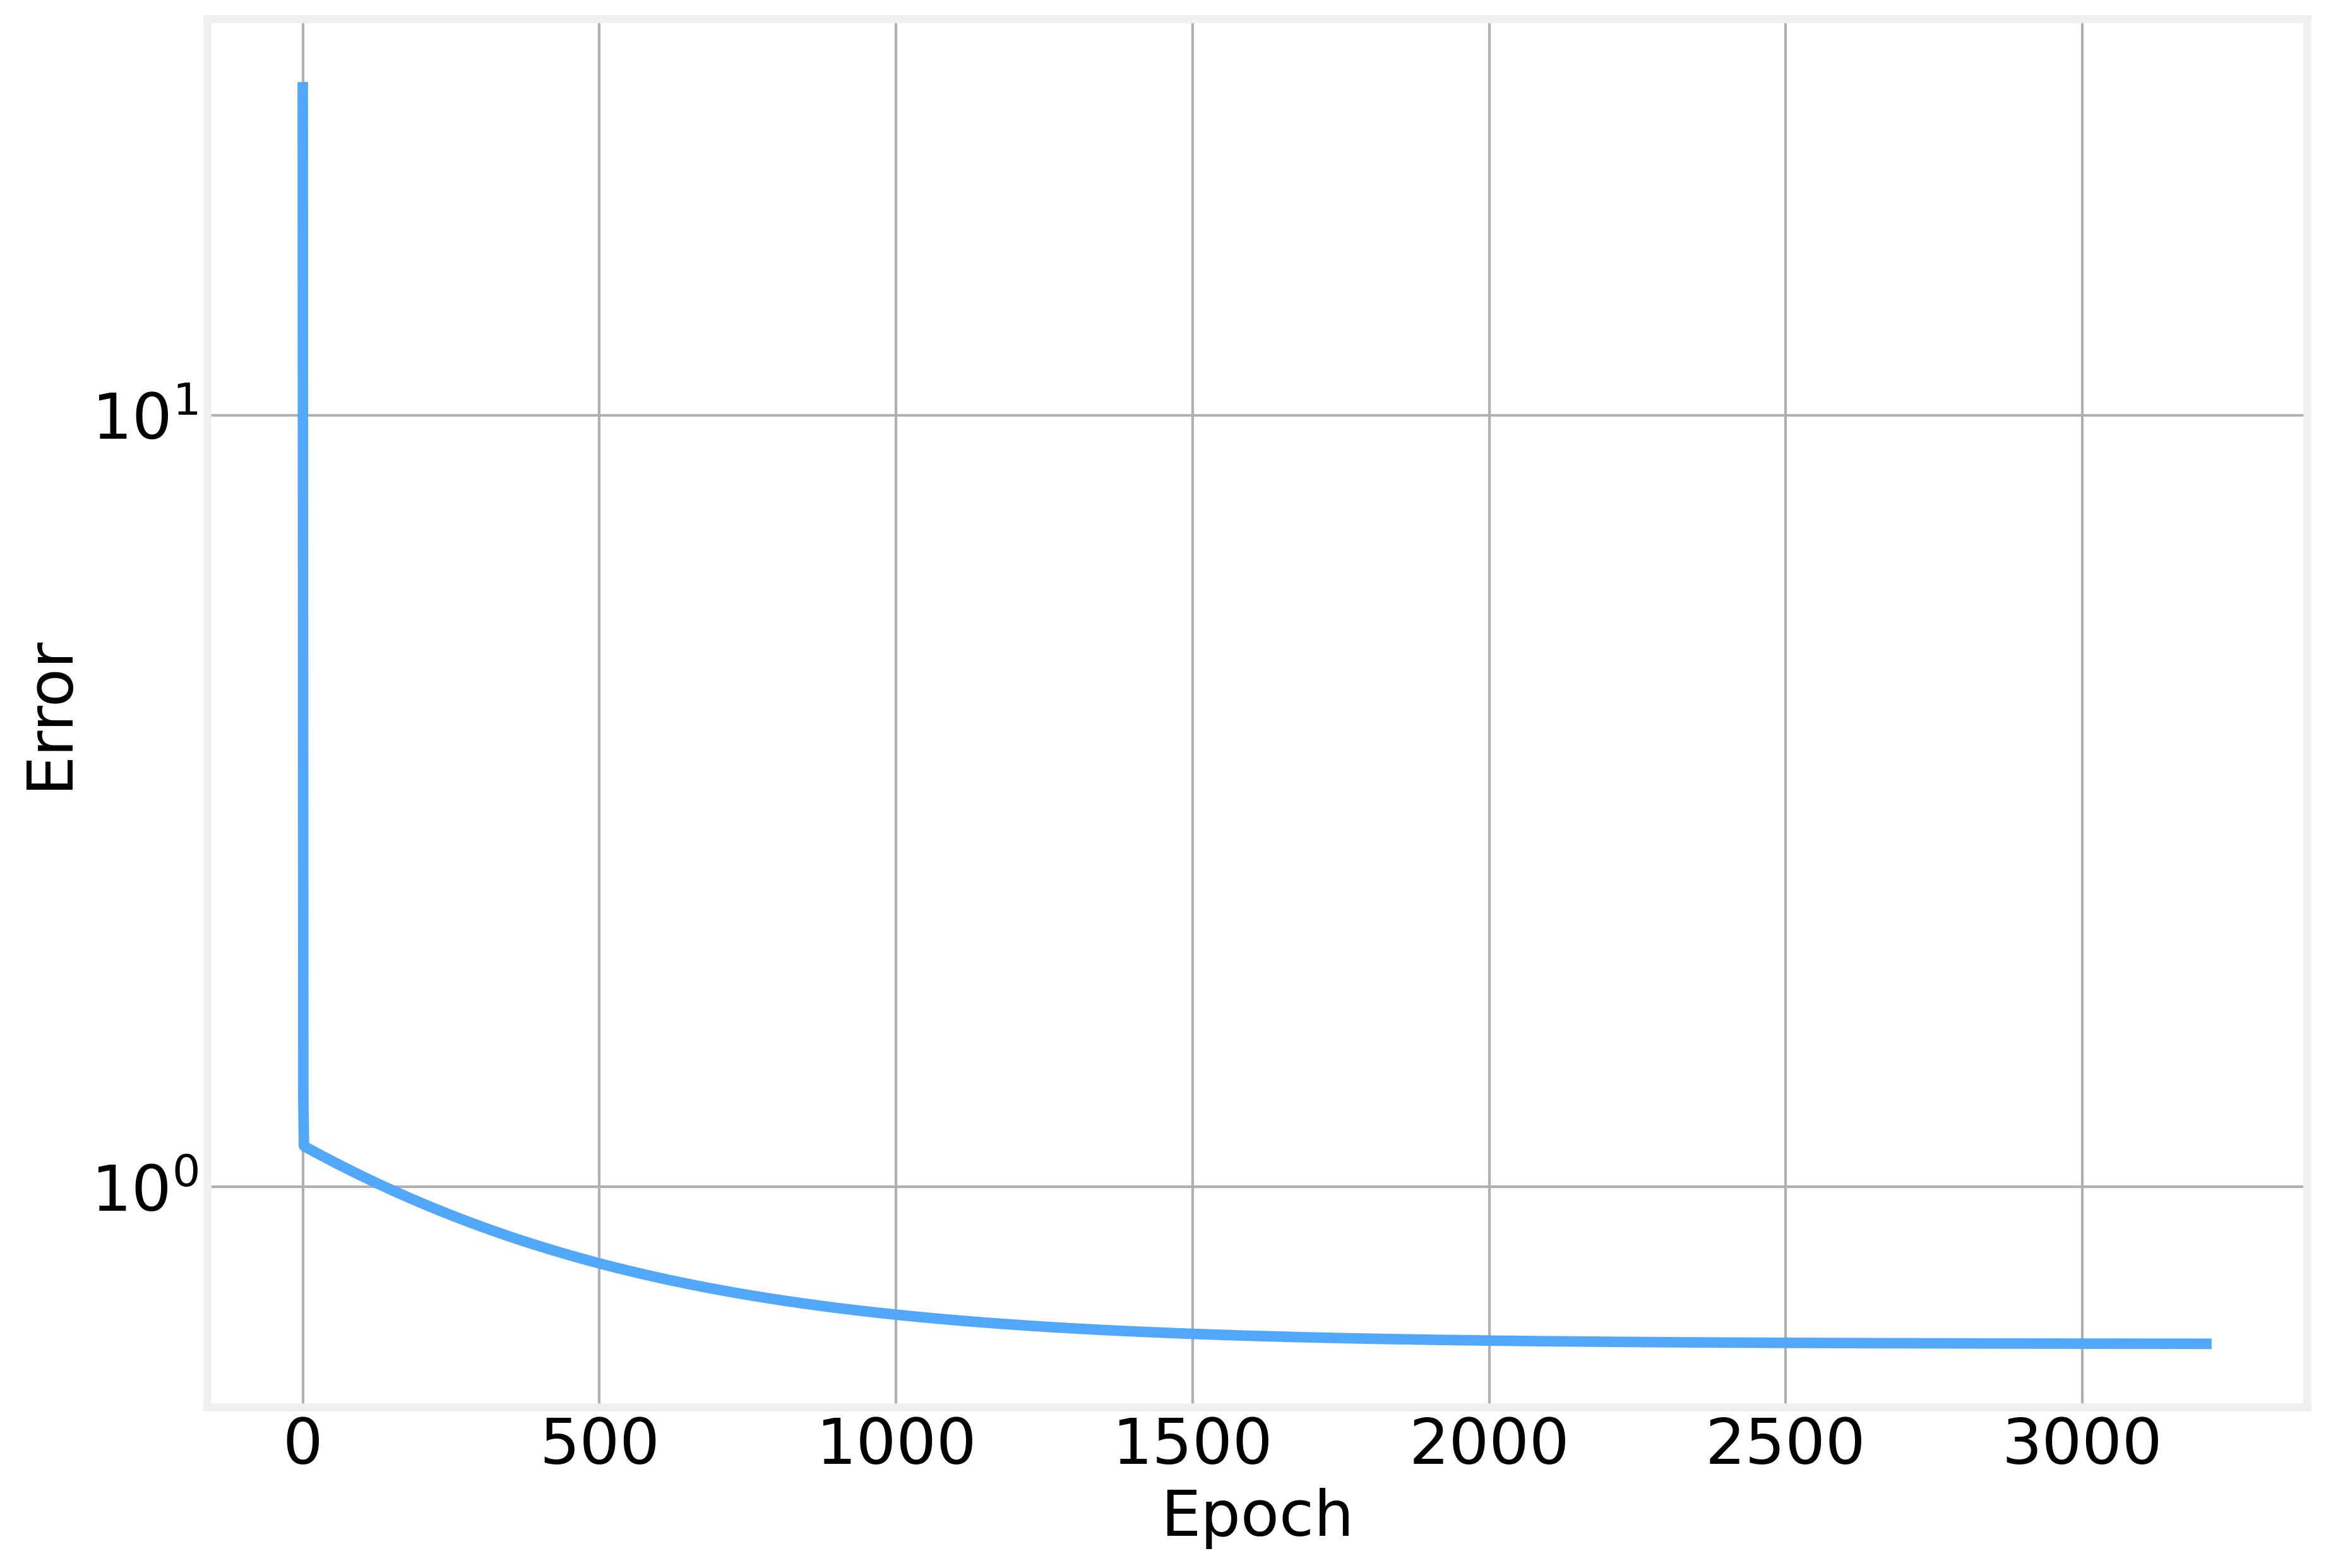

In [14]:
fig, ax = plt.subplots(1)
ax.semilogy(Js)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

In [15]:
weights.flatten()

array([2.90889464, 0.50912112])

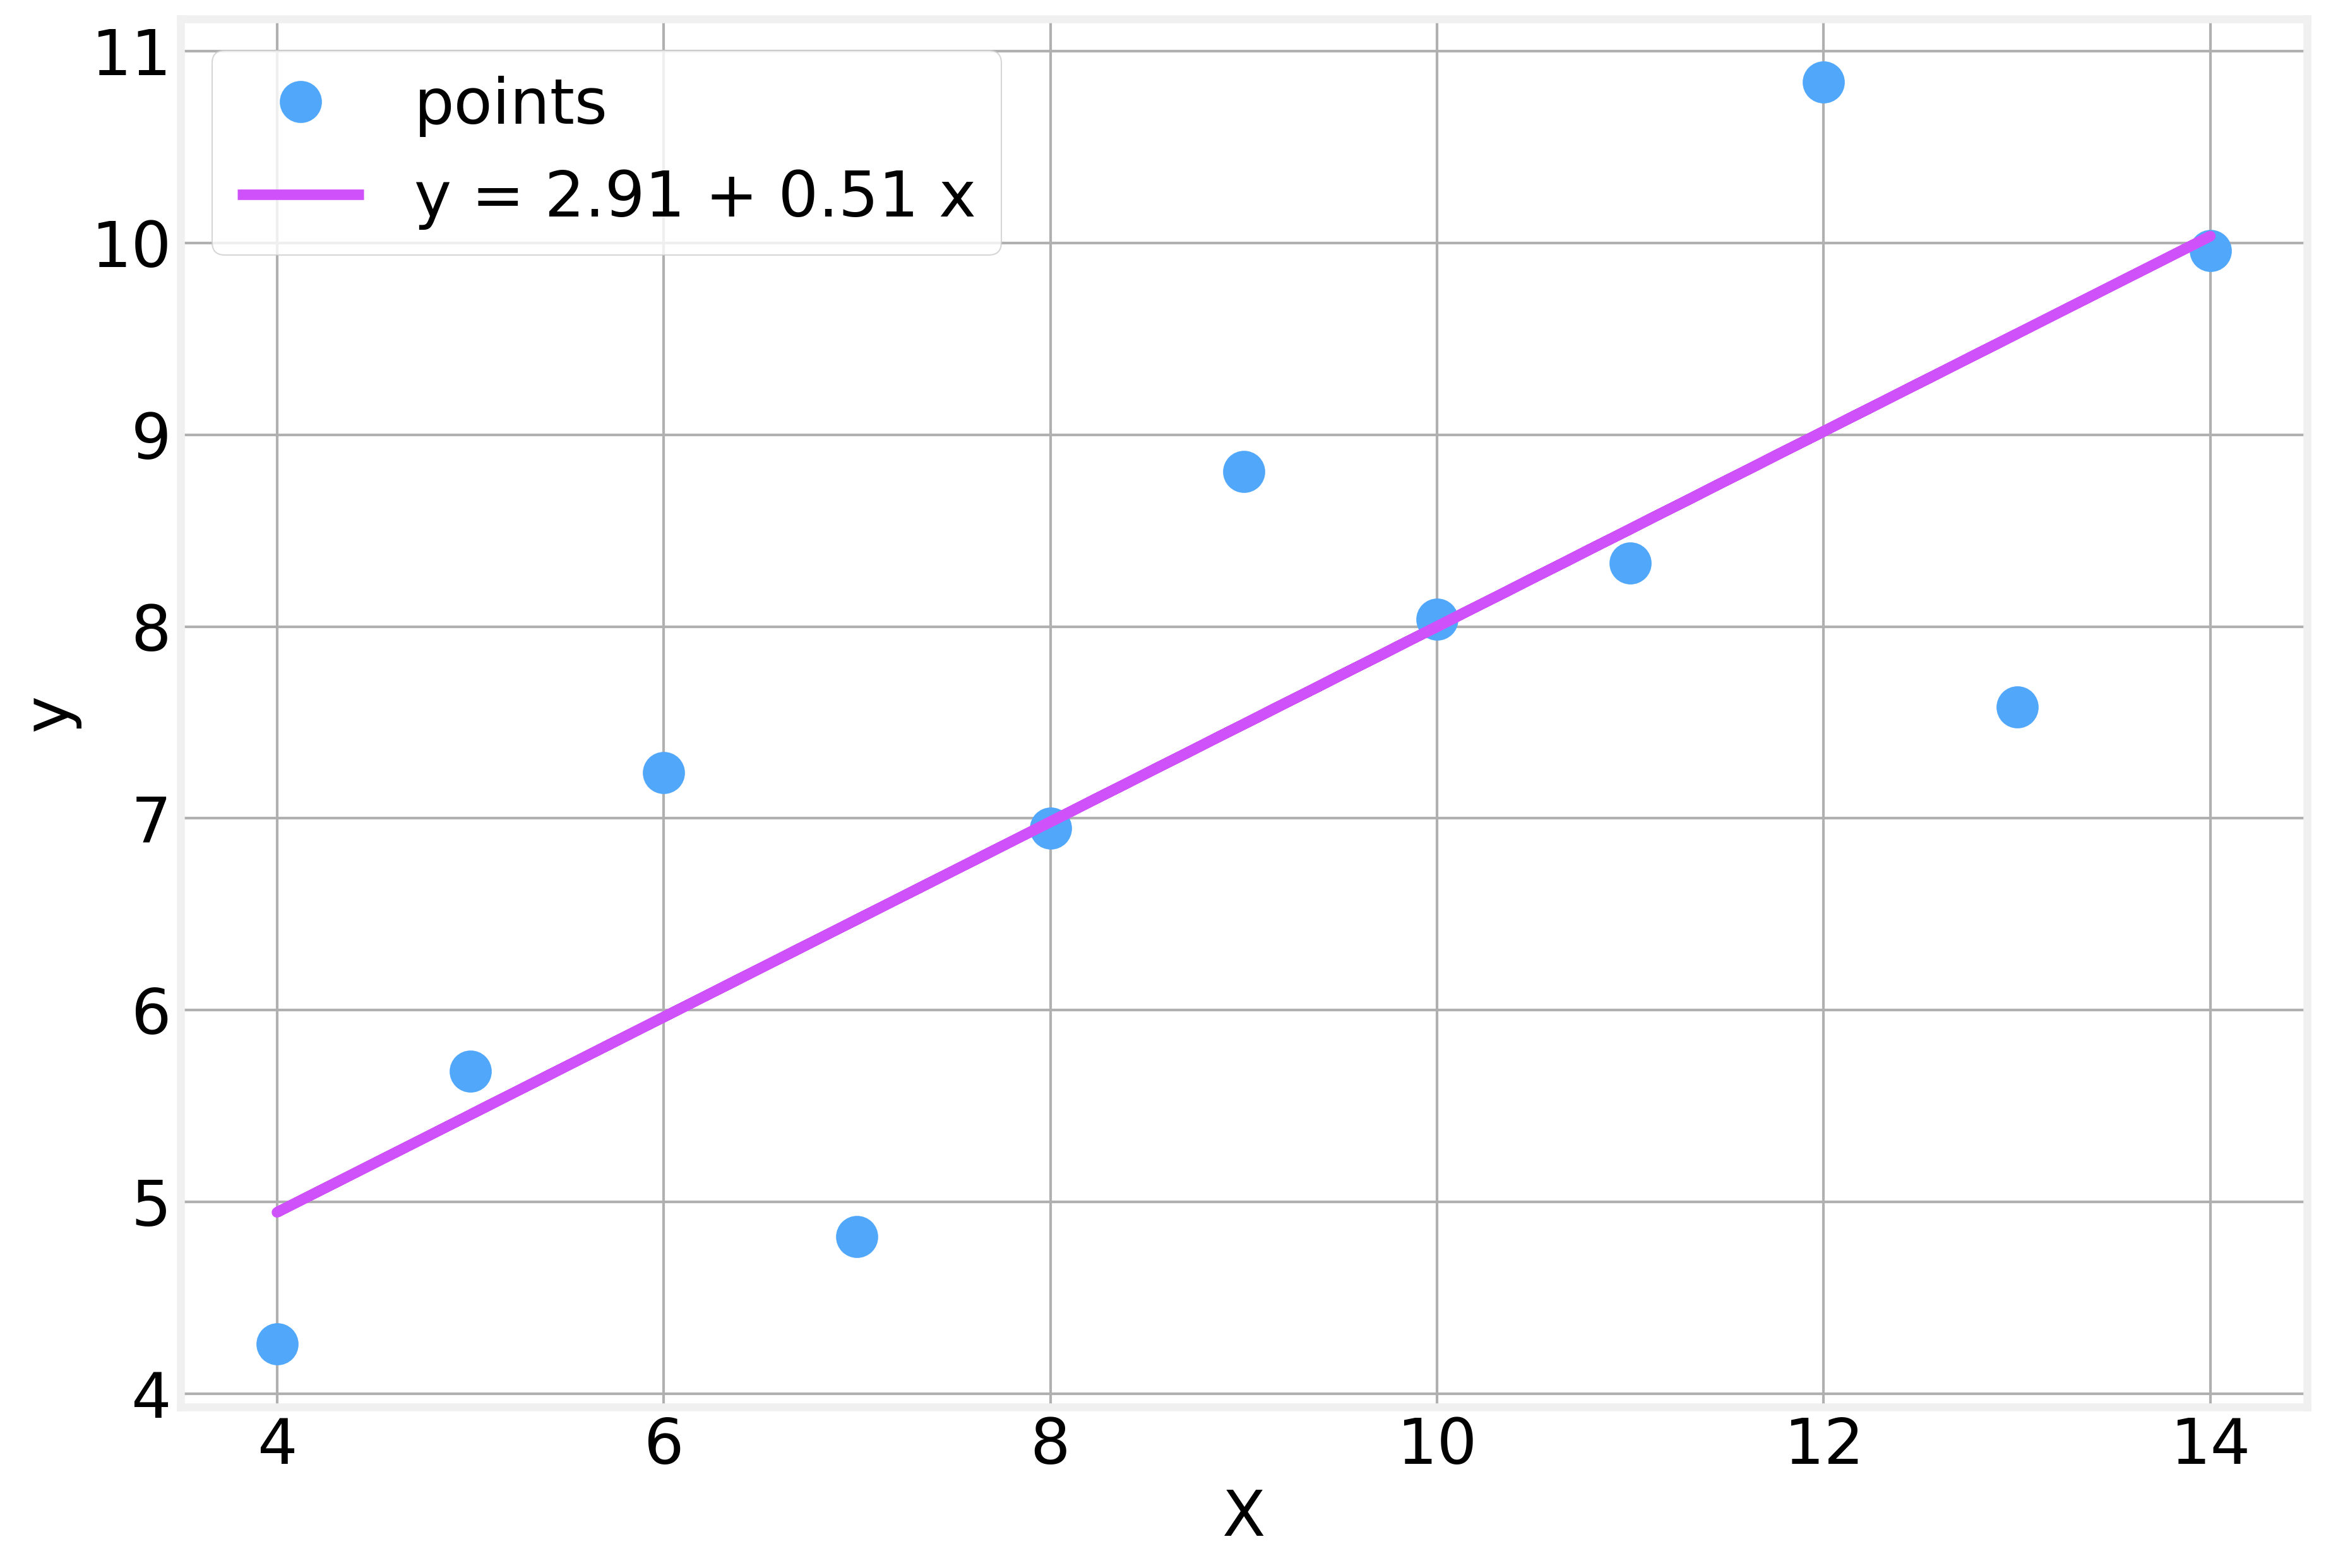

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [17]:
weights

array([[2.90889464],
       [0.50912112]])

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>